In [150]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import os

import datetime

In [151]:
weather = pd.read_csv("data/weather_v1.csv")
weather.head(2)

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS


In [152]:
weather.columns

Index(['area', 'datetime', 'temp', 'temp_QCFlag', 'prec', 'prec_QCFlag', 'ws',
       'ws_QCFlag', 'wd', 'wd_QCFlag', 'humid', 'humid_QCFlag', 'vaporP',
       'dew', 'landP', 'landP_QCFlag', 'seaP', 'seaP_QCFlag', 'suntime',
       'suntime_QCFlag', 'rad', 'snow', '3hr_snow', 'C', 'lowmiddleC', 'typeC',
       'ceiling', 'vis', 'sfctype', 'weathernumber', 'sfctemp',
       'sfctemp_QCFlag', 'landtemp_5cm', 'landtemp_10cm', 'landtemp_20cm',
       'landtemp_30cm', 'station'],
      dtype='object')

In [153]:
weather.drop(['temp_QCFlag', 'prec_QCFlag', 'ws_QCFlag',
              'wd_QCFlag', 'humid_QCFlag', 'landP_QCFlag',
              'seaP_QCFlag', 'suntime_QCFlag', 'sfctemp_QCFlag',],
             axis=1, inplace=True)

In [154]:
weather_land = weather[weather['area'] != 184]
weather_land.drop('area', axis=1, inplace=True)
weather_land.datetime = pd.to_datetime(weather_land['datetime'])

C:\Users\lonj7\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\lonj7\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [155]:
weather_land.drop('station', axis=1, inplace=True)

In [156]:
weather_land = weather_land.groupby('datetime').max()

In [157]:
weather_land.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17518 entries, 2018-02-01 01:00:00 to 2020-01-31 23:00:00
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp           17518 non-null  float64
 1   prec           17518 non-null  float64
 2   ws             17518 non-null  float64
 3   wd             17518 non-null  float64
 4   humid          17518 non-null  float64
 5   vaporP         17518 non-null  float64
 6   dew            17518 non-null  float64
 7   landP          17518 non-null  float64
 8   seaP           17518 non-null  float64
 9   suntime        9622 non-null   float64
 10  rad            9548 non-null   float64
 11  snow           174 non-null    float64
 12  3hr_snow       0 non-null      float64
 13  C              13747 non-null  float64
 14  lowmiddleC     13760 non-null  float64
 15  ceiling        11180 non-null  float64
 16  vis            17518 non-null  float64
 17  sfctype        

In [158]:
weather_land.drop(['3hr_snow', 'ceiling', 'sfctype', 'weathernumber',
                   'landtemp_5cm', 'landtemp_10cm', 'landtemp_20cm', 'landtemp_30cm',
                   'suntime', 'rad', 'lowmiddleC'],
                 axis=1, inplace=True)

In [159]:
weather_land.snow = weather_land.snow.fillna(0)
weather_land.C = weather_land.C.fillna(method='backfill')
weather_land.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17518 entries, 2018-02-01 01:00:00 to 2020-01-31 23:00:00
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     17518 non-null  float64
 1   prec     17518 non-null  float64
 2   ws       17518 non-null  float64
 3   wd       17518 non-null  float64
 4   humid    17518 non-null  float64
 5   vaporP   17518 non-null  float64
 6   dew      17518 non-null  float64
 7   landP    17518 non-null  float64
 8   seaP     17518 non-null  float64
 9   snow     17518 non-null  float64
 10  C        17518 non-null  float64
 11  vis      17518 non-null  float64
 12  sfctemp  17518 non-null  float64
dtypes: float64(13)
memory usage: 1.9 MB


In [160]:
weather_land.head(1)

,temp,prec,ws,wd,humid,vaporP,dew,landP,seaP,snow,C,vis,sfctemp
datetime,,,,,,,,,,,,,
2018-02-01 01:00:00,5.5,0.5,7.4,356.1,99.9,7.3,2.5,1025.4,1033.1,0.0,10.0,2000.0,3.1


In [161]:
weather_land.tail(1)

,temp,prec,ws,wd,humid,vaporP,dew,landP,seaP,snow,C,vis,sfctemp
datetime,,,,,,,,,,,,,
2020-01-31 23:00:00,7.5,0.0,8.7,360.0,97.1,7.5,2.8,1023.4,1032.5,0.0,8.0,2000.0,4.7


In [162]:
smp_hourly = pd.read_csv("data/hourly_smp_v1.csv")
smp_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  17520 non-null  object 
 1   smp       17520 non-null  float64
dtypes: float64(1), object(1)
memory usage: 273.9+ KB


In [163]:
smp_hourly.head(1)

,datetime,smp
0,2018-02-01 01:00,116.84


In [164]:
smp_hourly.tail(1)

,datetime,smp
17519,2020-01-31 24:00,123.03


In [165]:
smp_hourly['datetime'] = smp_hourly['datetime'].str.replace('24:00', '0:00')

smp_hourly['datetime'] = pd.to_datetime(smp_hourly['datetime'])

smp_hourly.index = smp_hourly['datetime']
smp_hourly.index = smp_hourly.index.rename('datetime')

smp_hourly.drop('datetime', axis=1, inplace=True)

In [166]:
data = weather_land.copy()
data['smp'] = smp_hourly['smp']

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17518 entries, 2018-02-01 01:00:00 to 2020-01-31 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     17518 non-null  float64
 1   prec     17518 non-null  float64
 2   ws       17518 non-null  float64
 3   wd       17518 non-null  float64
 4   humid    17518 non-null  float64
 5   vaporP   17518 non-null  float64
 6   dew      17518 non-null  float64
 7   landP    17518 non-null  float64
 8   seaP     17518 non-null  float64
 9   snow     17518 non-null  float64
 10  C        17518 non-null  float64
 11  vis      17518 non-null  float64
 12  sfctemp  17518 non-null  float64
 13  smp      17518 non-null  float64
dtypes: float64(14)
memory usage: 2.0 MB


In [173]:
print(data.shape)

(17518, 14)


In [174]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [175]:
TRAIN_SPLIT = 15000

In [176]:
tf.random.set_seed(13)

In [178]:
uni_data = data['smp']
uni_data.index = data.index
uni_data.head()

datetime
2018-02-01 01:00:00    116.84
2018-02-01 02:00:00    116.84
2018-02-01 03:00:00    116.84
2018-02-01 04:00:00    116.84
2018-02-01 05:00:00    116.84
Name: smp, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C530AB7D88>],
      dtype=object)

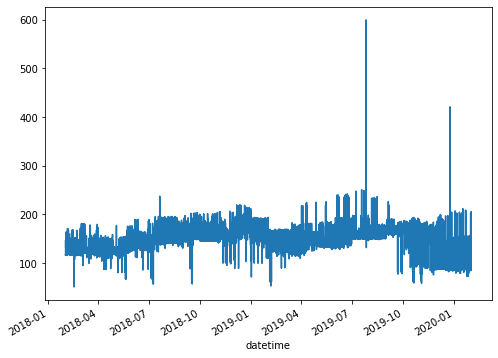

In [179]:
uni_data.plot(subplots=True)

In [180]:
uni_data = uni_data.values

In [182]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [183]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [184]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [186]:
print ('past history')
print (x_train_uni[0])
print ('\n Target smp to predict')
print (y_train_uni[0])

past history
[[-1.52367106]
 [-1.52367106]
 [-1.52367106]
 [-1.52367106]
 [-1.52367106]
 [-1.52367106]
 [-1.52367106]
 [-1.52367106]
 [-0.16149751]
 [-0.44862899]
 [-0.37060906]
 [-0.68042076]
 [-0.84825433]
 [-0.79971868]
 [-0.79971868]
 [-0.79971868]
 [-0.68042076]
 [-0.56066924]
 [ 0.0099649 ]
 [-0.01044729]]

 Target smp to predict
-0.07032305249274724


In [187]:
def create_time_steps(length):
  return list(range(-length, 0))

In [188]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\lonj7\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

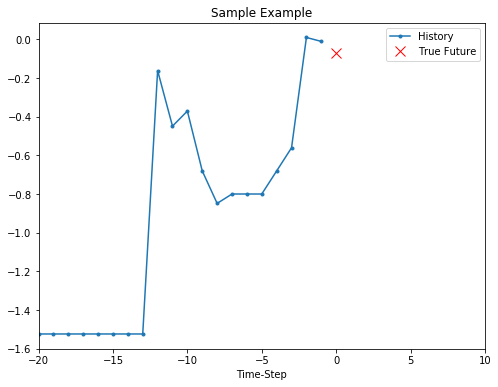

In [189]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [190]:
def baseline(history):
  return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\lonj7\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

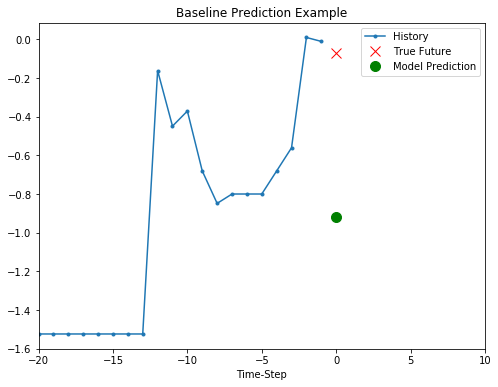

In [191]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [192]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [193]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [194]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [241]:
EVALUATION_INTERVAL = 800
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=5)

Train for 800 steps, validate for 5 steps
Epoch 1/10
800/800 [==============================] - 9s 12ms/step - loss: 0.3013 - val_loss: 0.8010
Epoch 2/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3011 - val_loss: 0.8019
Epoch 3/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3010 - val_loss: 0.8153
Epoch 4/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3011 - val_loss: 0.7977
Epoch 5/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3009 - val_loss: 0.8086
Epoch 6/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3002 - val_loss: 0.8076
Epoch 7/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3009 - val_loss: 0.8088
Epoch 8/10
800/800 [==============================] - 9s 12ms/step - loss: 0.3004 - val_loss: 0.8077
Epoch 9/10
800/800 [==============================] - 10s 12ms/step - loss: 0.3004 - val_loss: 0.8145
Epoch 10/10
800/800 [=====================

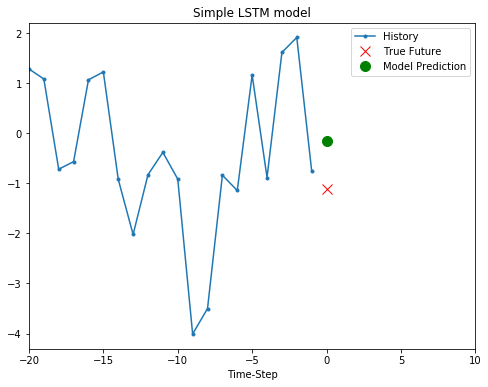

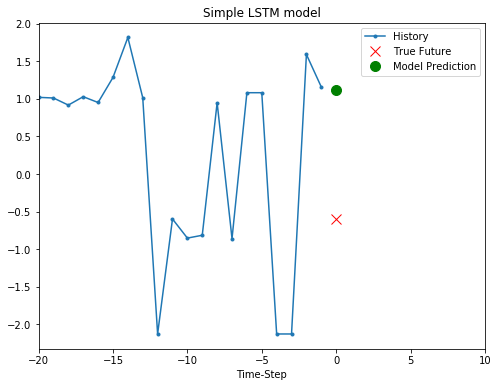

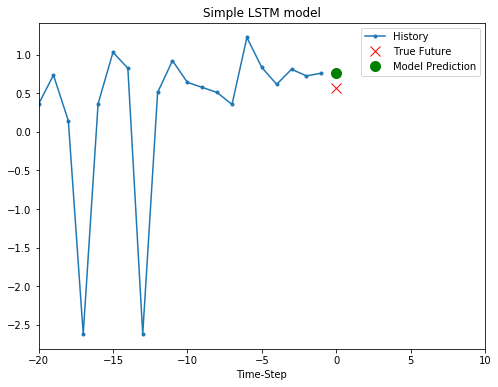

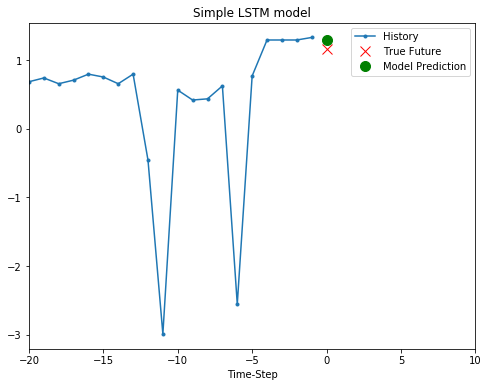

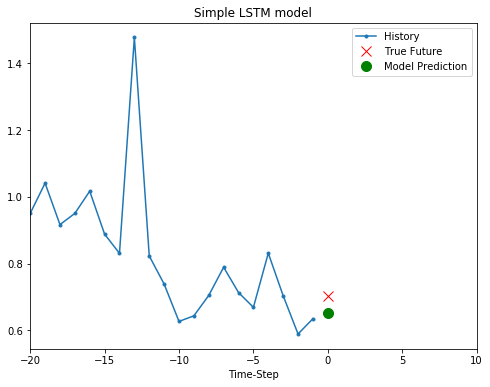

In [242]:
for x, y in val_univariate.take(5):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [243]:
features_considered = ['temp', 'prec', 'ws', 'wd', 'humid',
                       'vaporP', 'dew', 'landP', 'seaP', 
                       'snow', 'C', 'vis', 'sfctemp']

In [244]:
features = data[features_considered]
features.index = data.index
features.head()

,temp,prec,ws,wd,humid,vaporP,dew,landP,seaP,snow,C,vis,sfctemp
datetime,,,,,,,,,,,,,
2018-02-01 01:00:00,5.5,0.5,7.4,356.1,99.9,7.3,2.5,1025.4,1033.1,0.0,10.0,2000.0,3.1
2018-02-01 02:00:00,5.3,0.0,7.2,356.9,99.9,7.4,2.7,1025.3,1032.9,0.0,10.0,2000.0,3.0
2018-02-01 03:00:00,5.3,0.0,7.2,360.0,99.9,7.0,1.9,1025.2,1032.7,0.0,10.0,2000.0,2.0
2018-02-01 04:00:00,5.3,0.0,7.6,360.0,99.9,6.4,0.7,1024.9,1032.2,0.0,10.0,2000.0,2.7
2018-02-01 05:00:00,5.0,0.5,8.7,356.5,99.9,6.2,0.2,1024.8,1032.0,0.0,10.0,2000.0,2.4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5895D9DC8>,
      dtype=object)

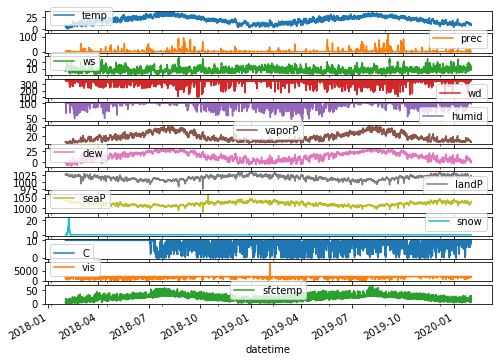

In [245]:
features.plot(subplots=True)

In [246]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [247]:
dataset = (dataset-data_mean)/data_std

In [248]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [249]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [250]:
print ('past history : {}'.format(x_train_single[0].shape))

past history : (120, 13)


In [251]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [252]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [253]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(256, 1)


In [260]:
EPOCHS = 20
EVALUATION_INTERVAL = 800
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=200)

Train for 800 steps, validate for 200 steps
Epoch 1/20
800/800 [==============================] - 102s 127ms/step - loss: 0.1642 - val_loss: 0.1197
Epoch 2/20
800/800 [==============================] - 101s 127ms/step - loss: 0.1618 - val_loss: 0.1227
Epoch 3/20
800/800 [==============================] - 102s 127ms/step - loss: 0.1603 - val_loss: 0.1209
Epoch 4/20
800/800 [==============================] - 102s 127ms/step - loss: 0.1574 - val_loss: 0.1226
Epoch 5/20
800/800 [==============================] - 101s 127ms/step - loss: 0.1552 - val_loss: 0.1205
Epoch 6/20
800/800 [==============================] - 102s 127ms/step - loss: 0.1528 - val_loss: 0.1199
Epoch 7/20
800/800 [==============================] - 102s 128ms/step - loss: 0.1536 - val_loss: 0.1214
Epoch 8/20
800/800 [==============================] - 107s 133ms/step - loss: 0.1562 - val_loss: 0.1203
Epoch 9/20
800/800 [==============================] - 107s 134ms/step - loss: 0.1488 - val_loss: 0.1202
Epoch 10/20
800/800 

In [261]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

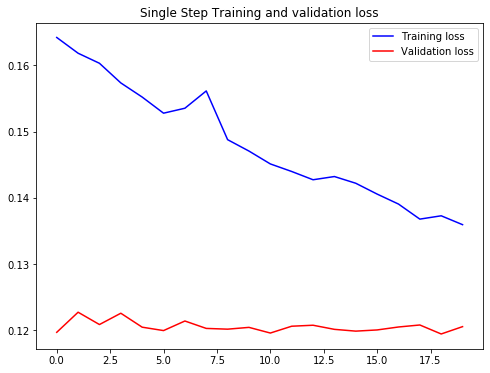

In [262]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

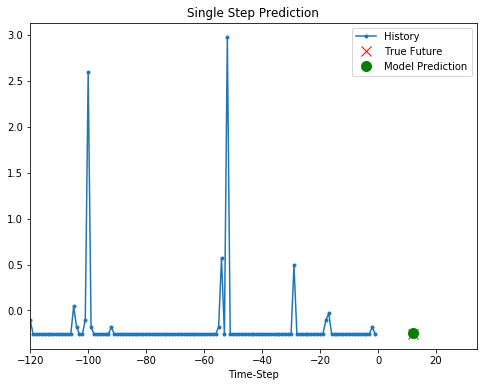

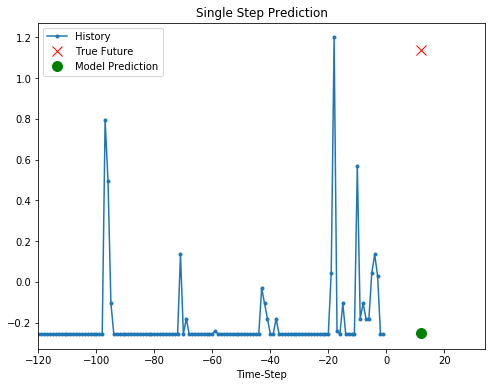

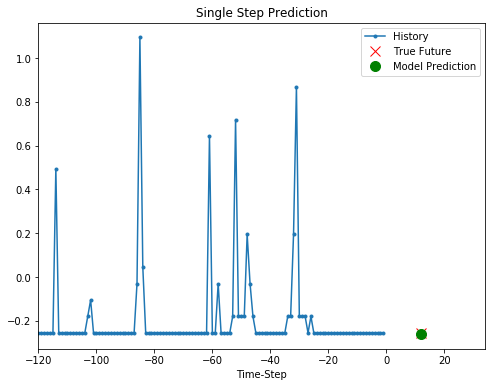

In [263]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

In [264]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [265]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 13)

 Target temperature to predict : (72,)


In [266]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [267]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

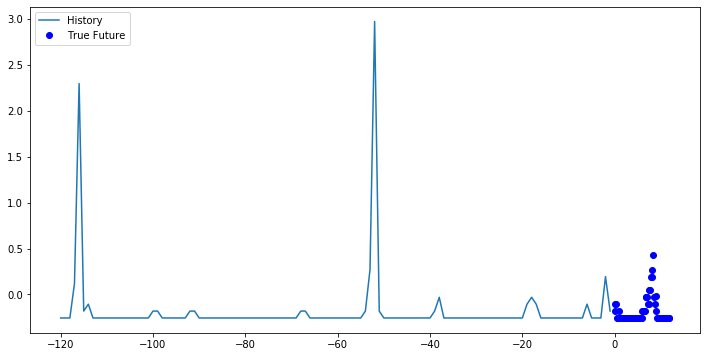

In [268]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [269]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [270]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(256, 72)


In [274]:
EPOCHS=10
EVALUATION_INTERVAL = 300
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=25)

Train for 300 steps, validate for 25 steps
Epoch 1/10
300/300 [==============================] - 75s 249ms/step - loss: 0.2590 - val_loss: 0.1079
Epoch 2/10
300/300 [==============================] - 75s 250ms/step - loss: 0.2552 - val_loss: 0.1099
Epoch 3/10
300/300 [==============================] - 74s 246ms/step - loss: 0.2449 - val_loss: 0.1075
Epoch 4/10
300/300 [==============================] - 75s 249ms/step - loss: 0.2386 - val_loss: 0.1095
Epoch 5/10
300/300 [==============================] - 77s 258ms/step - loss: 0.2340 - val_loss: 0.1081
Epoch 6/10
300/300 [==============================] - 76s 253ms/step - loss: 0.2249 - val_loss: 0.1093
Epoch 7/10
300/300 [==============================] - 75s 250ms/step - loss: 0.2206 - val_loss: 0.1081
Epoch 8/10
300/300 [==============================] - 73s 244ms/step - loss: 0.2158 - val_loss: 0.1076
Epoch 9/10
300/300 [==============================] - 72s 241ms/step - loss: 0.2093 - val_loss: 0.1071
Epoch 10/10
300/300 [=========

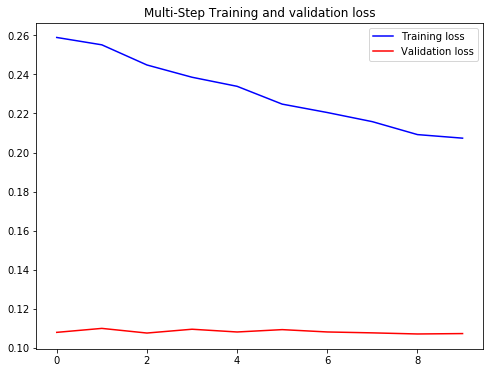

In [275]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

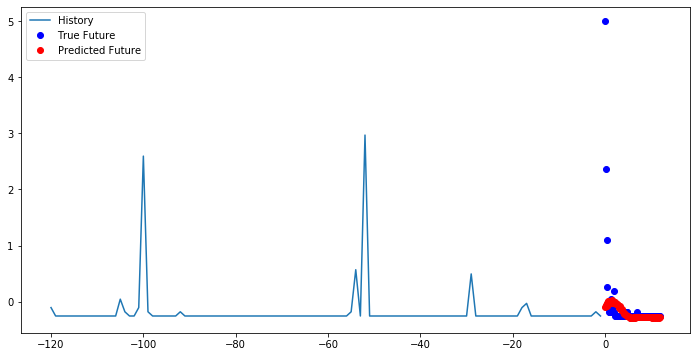

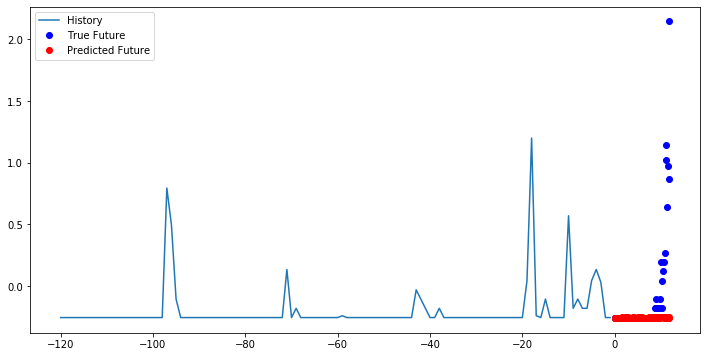

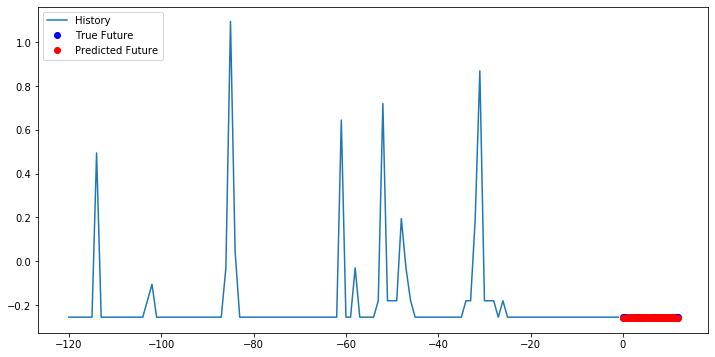

In [276]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])